In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import SGD,Adam


In [4]:
from tensorflow.keras import utils #用於分類資料轉換等 Keras 工具
np.random.seed(10)

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'

資料預處理

In [ ]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
x_Train_normalize = x_train_image/255
x_Test_normalize = x_test_image/255


In [ ]:
y_Train_OneHot = utils.to_categorical(y_train_label)
y_Test_OneHot = utils.to_categorical(y_test_label)


In [ ]:
x_train_image.shape

(50000, 32, 32, 3)

模型建立

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16,(3,3),padding='same',
         input_shape=(32,32,3),
         activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Conv2D(16,(3,3),padding='same',
         activation='relu'))

In [ ]:
model.add(MaxPool2D())

In [ ]:
model.add(Conv2D(32,(3,3),padding='same',
         activation='relu'))

In [ ]:
model.add(Conv2D(32,(3,3),padding='same',
         activation='relu'))


In [ ]:
model.add(MaxPool2D())

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

In [ ]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,146 (145.10 KB)

 Trainable params: 37,146 (145.10 KB)

 Non-trainable params: 0 (0.00 B)

None


訓練模型

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer= Adam(learning_rate = 0.001),
    metrics=['accuracy']
)

In [ ]:
train_history = model.fit(
    x = x_Train_normalize,
    y = y_Train_OneHot,
    validation_split = 0.2,
    epochs = 20,
    batch_size = 128,
    verbose = 2,
)

Epoch 1/20
313/313 - 84s - 267ms/step - accuracy: 0.3922 - loss: 1.6879 - val_accuracy: 0.4712 - val_loss: 1.4812
Epoch 2/20
313/313 - 81s - 259ms/step - accuracy: 0.5164 - loss: 1.3531 - val_accuracy: 0.5542 - val_loss: 1.2789
Epoch 3/20
313/313 - 86s - 273ms/step - accuracy: 0.5900 - loss: 1.1675 - val_accuracy: 0.6002 - val_loss: 1.1517
Epoch 4/20
313/313 - 138s - 440ms/step - accuracy: 0.6277 - loss: 1.0650 - val_accuracy: 0.6117 - val_loss: 1.0948
Epoch 5/20
313/313 - 88s - 281ms/step - accuracy: 0.6574 - loss: 0.9821 - val_accuracy: 0.6379 - val_loss: 1.0470
Epoch 6/20
313/313 - 136s - 434ms/step - accuracy: 0.6815 - loss: 0.9205 - val_accuracy: 0.6629 - val_loss: 0.9745
Epoch 7/20
313/313 - 83s - 267ms/step - accuracy: 0.6977 - loss: 0.8699 - val_accuracy: 0.6678 - val_loss: 0.9565
Epoch 8/20
313/313 - 85s - 272ms/step - accuracy: 0.7103 - loss: 0.8347 - val_accuracy: 0.6806 - val_loss: 0.9285
Epoch 9/20
313/313 - 142s - 453ms/step - accuracy: 0.7263 - loss: 0.7951 - val_accurac

以圖形顯示訓練過程

In [ ]:
train_history.history

{'accuracy': [0.3921999931335449,
  0.5163999795913696,
  0.5899500250816345,
  0.6276999711990356,
  0.6573749780654907,
  0.6814500093460083,
  0.697700023651123,
  0.7103250026702881,
  0.7263249754905701,
  0.73642498254776,
  0.745074987411499,
  0.7545750141143799,
  0.763450026512146,
  0.7692999839782715,
  0.7774500250816345,
  0.7856749892234802,
  0.7932000160217285,
  0.7949000000953674,
  0.8026750087738037,
  0.8084999918937683],
 'loss': [1.687862515449524,
  1.353117823600769,
  1.1675443649291992,
  1.064957618713379,
  0.9820700883865356,
  0.9204756617546082,
  0.8698536157608032,
  0.8347499966621399,
  0.7951350808143616,
  0.7669493556022644,
  0.7380887866020203,
  0.7107811570167542,
  0.686410665512085,
  0.6683194041252136,
  0.6458508372306824,
  0.6188399195671082,
  0.6026407480239868,
  0.5867483019828796,
  0.5712517499923706,
  0.5522372126579285],
 'val_accuracy': [0.47119998931884766,
  0.5541999936103821,
  0.6001999974250793,
  0.6116999983787537,
  

In [ ]:
import matplotlib.pyplot as plt

# 畫出訓練過程每一個epoch訓練資料與驗證資料各自準確率(accuracy)的變化，或者損失誤差(loss)的變化
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

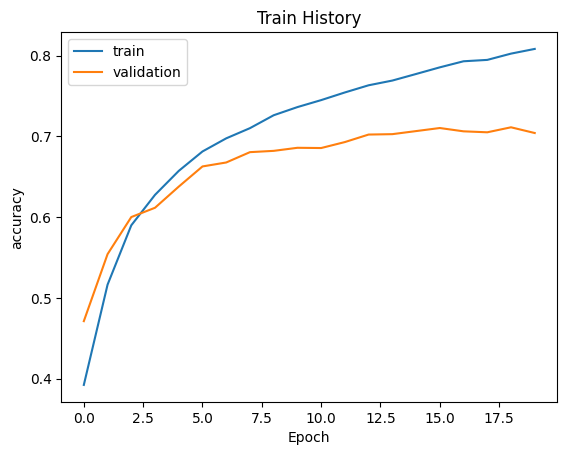

In [ ]:
show_train_history(train_history,'accuracy','val_accuracy')

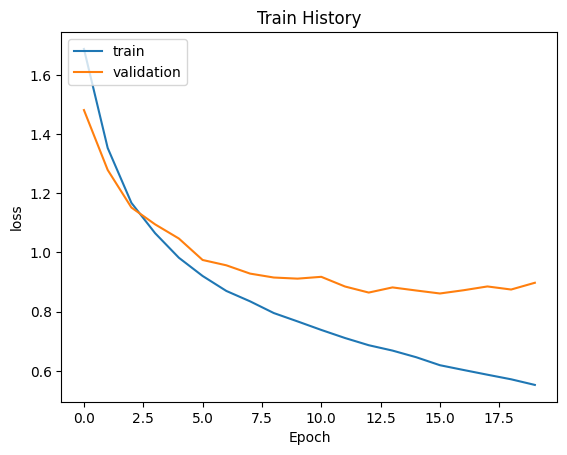

In [ ]:
show_train_history(train_history,'loss','val_loss')

評估模型準確率

In [ ]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.6973 - loss: 0.9282

accuracy= 0.6960999965667725


進行預測

In [ ]:
class_names = ["airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [ ]:
prediction=model.predict(x_test_image)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


In [ ]:
predicted_lable = np.argmax(prediction[6])
predicted_lable

np.int64(1)

In [ ]:
predicted_lable = np.argmax(prediction[6])
predicted_lable

np.int64(1)

In [ ]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1 + i)
        ax.imshow(images[idx])
        title = "label=" + str(class_names[labels[idx][0]]) + "\n"
        if prediction is not None:
            title += "predict=" + str(class_names[np.argmax(prediction[idx])])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx += 1
    plt.show()

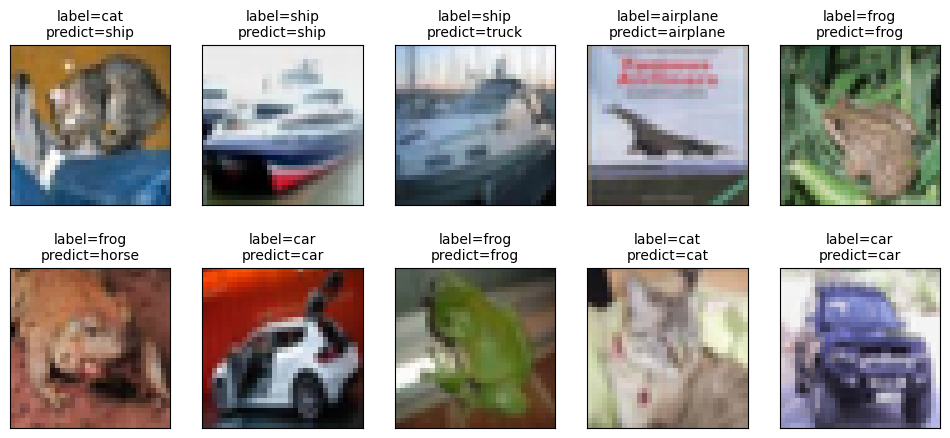

In [ ]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=0)

confusion matrix (混淆矩陣)

In [ ]:
import pandas as pd
predicted_labels = np.argmax(prediction, axis=1)
pd.crosstab(y_test_label.ravel(), predicted_labels, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,693,30,40,16,87,1,6,21,78,28
1,79,754,1,2,1,1,0,4,43,115
2,167,38,340,83,74,78,24,120,44,32
3,109,41,30,358,38,128,15,150,69,62
4,97,27,52,111,344,44,26,237,35,27
5,76,24,27,137,25,472,12,160,23,44
6,67,64,43,103,33,39,435,41,92,83
7,62,14,10,19,16,32,2,791,17,37
8,161,22,2,6,35,2,0,9,727,36


In [ ]:
df = pd.DataFrame({'label': y_test_label.ravel(), 'predict': predicted_labels})
df[:10]

,label,predict
0,3,8
1,8,8
2,8,9
3,0,0
4,6,6
5,6,7
6,1,1
7,6,6
8,3,3
9,1,1


In [ ]:
df[(df.label==5)&(df.predict==3)]

,label,predict
31,5,3
101,5,3
128,5,3
178,5,3
345,5,3
...,...,...
9774,5,3
9815,5,3
9823,5,3
9844,5,3


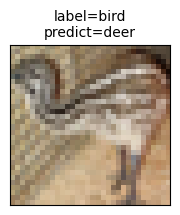

In [ ]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

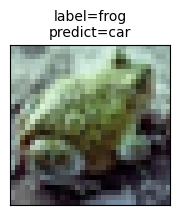

In [ ]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd 'content/drive/My Drive/Colab Notebooks'

[Errno 2] No such file or directory: 'content/drive/My Drive/Colab Notebooks'
/content


In [ ]:
model.save('/content/drive/My Drive/hw3_model.keras')

In [ ]:
!ls "/content/drive/My Drive"

 0508.accdb
'13851_2018 高職物理課後作業2-1直線運動.pdf'
 3B032080_0515.accdb
 3B032080謝東霖
'3B032080謝東霖 (1).accdb'
 3B032080謝東霖.7z
 3B032080謝東霖.accdb
 3B032080謝東霖.docx
 3B032080謝東霖HW1
 3B032080謝東霖HW4.accdb
'Colab Notebooks'
 DIP
 hw3.ipynb
 hw3_model.keras
 IMG_9420.JPG
 IMG_9421.JPG
'Northwind (1)1 (1).accdb'
'Northwind (1)1 (2).accdb'
'Northwind (1)1.accdb'
'Northwind (1)1.accdb最新.accdb'
'Northwind (1).accdb'
 Northwind.ldb
 Northwind.mdb
 pythonclass
 Yeaaahjinmianshan
 使用者檔.xls
 價格檔.xls
 品項內容.xlsx
'專題PPT 影片'
 專題小論文
 庫存檔.xls
'未命名绘图 (1).drawio'
 未命名绘图.drawio
 申請人.xlsx
 申請日期.xlsx
 申請明細.xlsx
 申領檔.xls
 資料庫管理.docx
'電子學附屬教材 - Google 雲端硬碟'
